# 단속요일별 단속현황 시각화

### 1. 데이터셋 로드

In [1]:
import pandas as pd

# 데이터 파일 경로
file_path = 'C:\GitHub_Project\Parker_AI-ML\data\단속요일별 단속현황..csv'  

# 데이터 불러오기
data = pd.read_csv(file_path, encoding='utf-8')

data

<>:4: SyntaxWarning: invalid escape sequence '\G'
<>:4: SyntaxWarning: invalid escape sequence '\G'
C:\Users\esroh\AppData\Local\Temp\ipykernel_25680\2939232711.py:4: SyntaxWarning: invalid escape sequence '\G'
  file_path = 'C:\GitHub_Project\Parker_AI-ML\data\단속요일별 단속현황..csv'


,시군구명,과태료명,단속요일,단속건수,단속원금
0,종로구,주정차위반과태료,금요일,"22,918","1,063,825,000"
1,종로구,주정차위반과태료,목요일,"22,636","1,053,680,000"
2,종로구,주정차위반과태료,수요일,"22,595","1,054,470,000"
3,종로구,주정차위반과태료,월요일,"20,874","974,150,000"
4,종로구,주정차위반과태료,일요일,"13,565","545,805,000"
...,...,...,...,...,...
204,시청,버스전용차로위반과태료,수요일,"24,480","1,223,995,000"
205,시청,버스전용차로위반과태료,월요일,"21,813","1,091,100,000"
206,시청,버스전용차로위반과태료,일요일,"4,724","236,515,000"
207,시청,버스전용차로위반과태료,토요일,"5,806","290,640,000"


### 2. 주정차위반과태료 칼럼만 출출

In [3]:
# 1. '주정차위반과태료'에 해당하는 행만 필터링
filtered_data = data[data['과태료명'].str.contains("주정차위반과태료")]
filtered_data

,시군구명,과태료명,단속요일,단속건수,단속원금
0,종로구,주정차위반과태료,금요일,"22,918","1,063,825,000"
1,종로구,주정차위반과태료,목요일,"22,636","1,053,680,000"
2,종로구,주정차위반과태료,수요일,"22,595","1,054,470,000"
3,종로구,주정차위반과태료,월요일,"20,874","974,150,000"
4,종로구,주정차위반과태료,일요일,"13,565","545,805,000"
...,...,...,...,...,...
197,강동구,주정차위반과태료,수요일,"6,229","286,290,000"
198,강동구,주정차위반과태료,월요일,"6,372","293,190,000"
199,강동구,주정차위반과태료,일요일,"2,278","98,880,000"
200,강동구,주정차위반과태료,토요일,"2,390","104,630,000"


In [6]:
print(filtered_data.columns)


Index(['시군구명', '과태료명', '단속요일', '단속건수', '단속원금'], dtype='object')


### 3. 데이터셋 요일을 기준으로 칼럼 재비치 

In [16]:
# 2. 요일별로 자치구별 단속 건수를 집계
# 피벗 테이블 생성 ('단속요일'을 행으로, '시군구명'을 열로 설정)
pivot_data = pd.pivot_table(
    filtered_data,
    index='단속요일',       # 행: 단속요일
    columns='시군구명',    # 열: 자치구 (시군구명)
    values='단속건수',      # 집계 대상: 단속건수
    aggfunc='sum',         # 각 자치구에서 단속 건수 합계
    fill_value=0           # 결측값은 0으로 채움
)

# 3. 요일 순서 재정렬 (월~금)
ordered_weekdays = ['월요일', '화요일', '수요일', '목요일', '금요일','토요일','일']  # 요일 순서 지정
pivot_data = pivot_data.loc[ordered_weekdays]

# 4. 자치구 순서를 기존 데이터 순서대로 유지
original_order = filtered_data['시군구명'].drop_duplicates().tolist()  # 원래 데이터의 자치구 순서 가져오기
pivot_data = pivot_data.reset_index()  # '단속요일'을 열로 변환
ordered_columns = ['단속요일'] + original_order  # '단속요일'과 자치구 순서를 결합
pivot_data = pivot_data[ordered_columns]  # 칼럼 순서 재정렬

# 5. 결과 확인
print(pivot_data)

시군구명 단속요일       종로구        중구       용산구      성동구      광진구      동대문구      중랑구  \
0     월요일   20,874    19,943     9,487    9,061    7,175    10,944    5,082    
1     화요일   23,192    20,068     9,714    9,327    7,044    11,230    5,135    
2     수요일   22,595    19,539     9,941    9,242    7,276    11,134    5,132    
3     목요일   22,636    20,291     9,516    9,108    7,060    11,122    5,004    
4     금요일   22,918    20,495    10,360    9,512    7,335    11,978    5,471    
5     토요일   10,790    12,882     5,388    3,610    6,329     6,217    2,991    
6     일요일   13,565    14,810     6,017    3,791    6,798     5,906    2,819    

시군구명      성북구      강북구  ...       강서구       구로구      금천구      영등포구      동작구  \
0      6,111    7,963   ...   23,411     9,091    7,408    13,904    8,079    
1      6,434    8,458   ...   24,129    10,019    7,615    14,029    8,623    
2      5,944    7,747   ...   24,958     9,289    7,168    13,296    8,174    
3      6,141    7,980   ...   25,021     9,

### 4. csv 파일 저장

In [18]:

# 6. 결과를 CSV로 저장 (필요할 경우)
pivot_data.to_csv("요일별_자치구별_단속건수.csv", index=False, encoding='utf-8-sig')

### 5. 요일이랑 총합만 표시 

In [19]:
# 데이터 로드
file_path = "요일별_자치구별_단속건수.csv"  # 파일 경로를 지정하세요.
data = pd.read_csv(file_path, encoding='utf-8')

# '단속요일'과 '총합' 칼럼만 선택
filtered_data = data[['단속요일', '총합']]

# 결과 출력
print(filtered_data)

  단속요일       총합
0  월요일  289,484
1  화요일  301,120
2  수요일  293,836
3  목요일  297,774
4  금요일  309,676
5  토요일  161,863
6  일요일  155,377


### 6. 요일별 단속현황 시각화

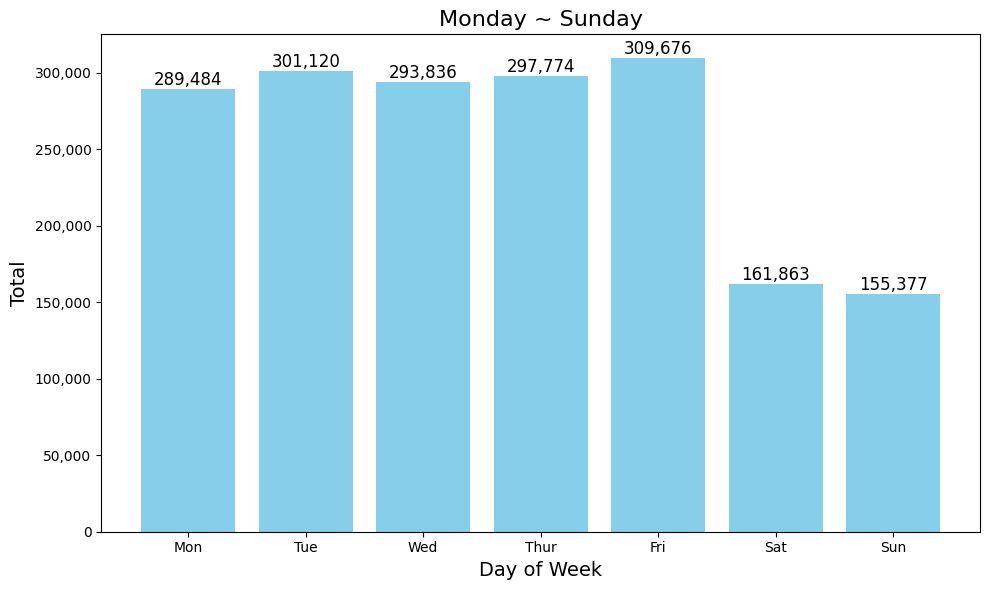

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import os


data = {
    'Day of Week': ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],
    'Total': [289484, 301120, 293836, 297774, 309676, 161863, 155377]
}

# DataFrame 생성
df = pd.DataFrame(data)

# 요일의 순서를 지정 (Monday~Sunday)
day_order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=day_order, ordered=True)
df = df.sort_values('Day of Week')

# 막대그래프 그리기
plt.figure(figsize=(10,6))
bars = plt.bar(df['Day of Week'], df['Total'], color='skyblue')

# 그래프 제목 및 라벨 설정 
plt.title('Monday ~ Sunday', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total', fontsize=14)

# y축 숫자에 천 단위 구분기호 추가
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 데이터 라벨 추가 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom', fontsize=12)

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()
